In [2]:
import os
import random as rnd
import pandas as pd
import time
import datetime
import tqdm
import numpy as np
import math as mt
import matplotlib.pyplot as plt
import google.colab.files as files
import warnings
warnings.filterwarnings('ignore')
import random as rnd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math as mt
import sympy
import statistics as st
from tqdm import tqdm
import random
import matplotlib.pyplot as plt

In [30]:
#chance
#pueden elegir el numero de manera manual o seleccionar el sistema de forma aleatoria
#sobre 10000
#juega todos los viernes
def chance():
    x = 1999
    ganador = 0
    contador = 0
    valorApostado = 0
    tiempo = 0

    while ganador == 0:
        contador += 1
        y = rnd.randint(0,9999)
        if y == x:
            ganador = 1
            valorApostado = contador * 10000


        tiempodias = contador * 7
        tiemposemanas = contador
        tiempoaños = tiempodias/360
        tiempomeses = tiemposemanas/4

    return contador

In [31]:
chance()

12709

Calculando replicas...: 100%|██████████| 1000/1000 [00:13<00:00, 76.73it/s]


La convergencia inica en 290


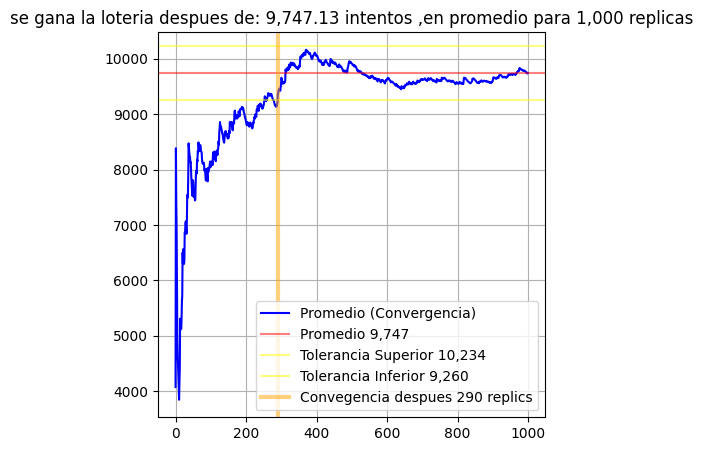

In [36]:
replics = 1000
vEstimation = []
vMean = []
for i in tqdm(range(replics), 'Calculando replicas...'):
    vEstimation.append(chance()) #siempre debe existir un tablero diferente
    vMean.append(st.mean(vEstimation))

vMeanR=vMean.copy()
vMeanR.reverse()
ts = vMean[-1]*1.05
ti = vMean[-1]*0.95
convergencia = 0
for j, k in enumerate(vMeanR):
    if k > ti and k < ts:
        pass
    else:
        convergencia = len(vMean)- j
        break
print(f'La convergencia inicia en {convergencia}')

plt.figure(figsize=(5,5))
plt.plot(vMean, color='blue', label='Promedio (Convergencia)')
plt.axhline(vMean[-1], color='red', alpha=0.5, label=f'Promedio {vMean[-1]:,.0f}')
plt.axhline(vMean[-1]*1.05, color='yellow', alpha=0.5, label=f'Tolerancia Superior {vMean[-1]*1.05:,.0f}')
plt.axhline(vMean[-1]*0.95, color='yellow', alpha=0.5, label=f'Tolerancia Inferior {vMean[-1]*0.95:,.0f}')
plt.axvline(convergencia, color='orange', alpha=0.5,  linewidth=3 ,label=f'Convegencia despues {convergencia} replics')
plt.grid('on')
plt.title(f'se gana la loteria despues de: {vMean[-1]:,.2f} intentos en promedio, para {replics:,} replicas')
plt.legend()
plt.show()

In [44]:
print(f'el gasto promedio es de {(vMean[-1])* 10000}' )
print(f'el tiempo promedio en dias es de {(vMean[-1])* 7}' )
print(f'el tiempo promedio en semanas es de  {(vMean[-1])}' )
print(f'el tiempo promeedio en meses es de {(vMean[-1])/4}' )
print(f'el tiempo promeedio en meses es de {(vMean[-1])/360}' )


el gasto promedio es de 97471299.99999999
el tiempo promedio en dias es de 68229.90999999999
el tiempo promedio en semanas es de  9747.13
el tiempo promeedio en meses es de 2436.7825
el tiempo promeedio en meses es de 27.07536111111111


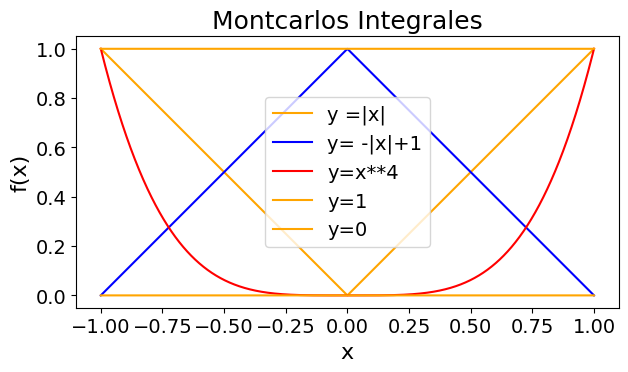

In [51]:
x= np.linspace(-1,1,2000)
nabsx= -np.abs(x)+1
pabsx= np.abs(x)
x4=x**4
yigualauno=np.ones_like(x)
yigualacero= np.zeros_like(x)
plt.rcParams.update({'font.size':14})
plt.figure(figsize=(7,7))
plt.plot(x,pabsx,color='orange',label='y =|x|')
plt.plot(x, nabsx, color='blue',label='y= -|x|+1')
plt.plot(x,x4,color='red',label='y=x**4')
plt.plot(x,yigualauno,color='orange',label='y=1')
plt.plot(x,yigualacero,color='orange',label='y=0')
plt.xlabel('x',fontsize=16)
plt.ylabel('f(x)',fontsize=16)
plt.title('Montcarlos Integrales',fontsize=18)
plt.legend(fontsize=14)
plt.axis('scaled')
plt.show()

1.0


Calculo de Proporcion para 1000 replicas: 100%|██████████| 1000/1000 [00:00<00:00, 86067.02it/s]

El area estimada para el area de color amarillo es 0.09 unidades cuadradas


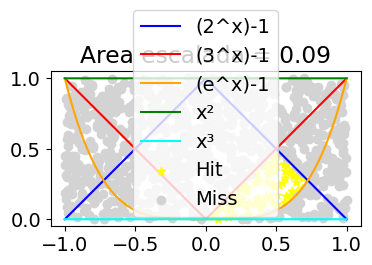

In [55]:
def valorabsoluto(x):
    nabsx= -np.abs(x)+1
    return nabsx
def valorabsoluto2(x):
    pabsx= np.abs(x)
    return pabsx
def exponencialbase4(x):
    x4=x**4
    return x4
def lineal(x):
    yigualauno=np.ones_like(x)
    return yigualauno
def cero(x):
    yigualacero= np.zeros_like(x)
    return yigualacero

maximo = np.concatenate((nabsx,pabsx,x4,yigualauno,yigualacero))
maximo = max(maximo)
print(maximo)

hit, miss = 0, 0
xhit = []
yhit = []
xmiss = []
ymiss = []
replicas = 1000
for i in tqdm(range(replicas), desc=f'Calculo de Proporcion para {replicas} replicas'):
    _x = rnd.uniform(-1,1)
    _y = rnd.uniform(0, maximo)
    eb2 = valorabsoluto(_x)
    eb3 = valorabsoluto2(_x)
    ebe = exponencialbase4(_x)
    cua = lineal(_x)
    cub = cero(_x)

    if (_y > ebe) and (_y < eb3) and (_y < eb2) and (_x>0):
        hit += 1
        xhit.append(_x)
        yhit.append(_y)
    else:
        xmiss.append(_x)
        ymiss.append(_y)
proporcion = hit/replicas
base = max(x)
altura = maximo
rectangulo = base * altura
area = rectangulo * proporcion
print(f'El area estimada para el area de color amarillo es {area:,.2f} unidades cuadradas')
plt.figure(figsize=(4, 4))
plt.plot(x, valorabsoluto(x), color='blue', label='(2^x)-1')
plt.plot(x, valorabsoluto2(x), color='red', label='(3^x)-1')
plt.plot(x, exponencialbase4(x), color='orange', label='(e^x)-1')
plt.plot(x, lineal(x), color='green', label='x²')
plt.plot(x, cero(x), color='cyan', label='x³')
plt.scatter(xhit,yhit, marker="*", color="yellow", label='Hit')
plt.scatter(xmiss,ymiss, marker="o", color="lightgray", label='Miss')
plt.title(f'Area escalada = {area:,.2f}')
plt.legend()
plt.axis('scaled')
plt.show()



1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0


Calculo Convergencia: 100%|██████████| 1000/1000 [00:00<00:00, 1231.89it/s]


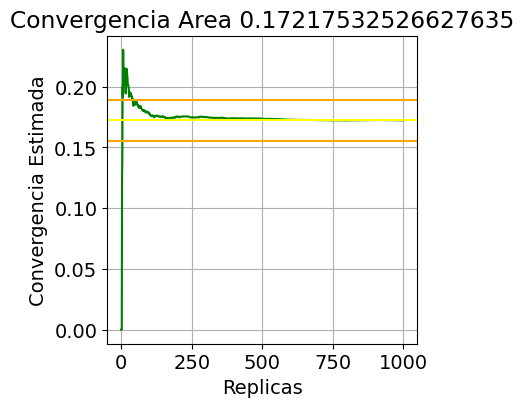

(-49.95, 1048.95, -0.011517857142857144, 0.241875)

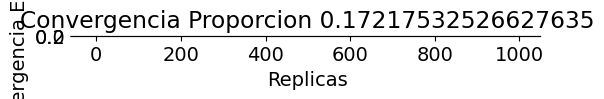

In [57]:
def Convergencia(replicas):
    maximo = np.concatenate((nabsx,pabsx,x4,yigualauno,yigualacero))
    maximo = max(maximo)
    print(maximo)
    hit = 0
    xhit = []
    yhit = []
    xmiss = []
    ymiss = []
    for i in range(replicas):
        _x = rnd.random()
        _y = rnd.uniform(0, maximo)
        eb2 = valorabsoluto(_x)
        eb3 = valorabsoluto2(_x)
        ebe = exponencialbase4(_x)
        #cua = lineal(_x)
        #cub = cero(_x)

        if (_y > ebe) and (_y < eb3) and (_y < eb2):
            hit += 1
            xhit.append(_x)
            yhit.append(_y)
        else:
            xmiss.append(_x)
            ymiss.append(_y)
    proporcion = hit/replicas
    base = max(x)
    altura = maximo
    rectangulo = base * altura
    area = rectangulo * proporcion
    return proporcion,area
varea = []
vproporcion = []
for i in range(1,1001):
    a,b = Convergencia(i)
    vproporcion.append(a)
    varea.append(b)
vpromedioa = []
promedioa = 0
convergenciaa = []
vpromediop = []
promediop = 0
convergenciap = []
for vp, va in tqdm(zip(vproporcion, varea), total=len(vproporcion), desc="Calculo Convergencia"):
    vpromedioa.append(va)
    promedioa = st.mean(vpromedioa)
    convergenciaa.append(promedioa)

    vpromediop.append(vp)
    promediop = st.mean(vpromediop)
    convergenciap.append(promediop)

plt.figure(figsize=(4,4))
plt.plot(convergenciaa, color='green',label='Convergencia Area')
plt.axhline(convergenciaa[-1], color='yellow')
plt.axhline(convergenciaa[-1]*1.1, color='orange')
plt.axhline(convergenciaa[-1]*0.9, color='orange')
plt.grid('on')
plt.title(f'Convergencia Area {convergenciaa[-1]}')
plt.xlabel('Replicas')
plt.ylabel('Convergencia Estimada')
plt.show()
plt.figure(figsize=(6,6))
plt.plot(convergenciap, color='green',label='Convergencia Area')
plt.axhline((convergenciap[-1]), color='yellow')
plt.axhline((convergenciap[-1])*1.1, color='orange')
plt.axhline((convergenciap[-1])*0.9, color='orange')
plt.grid('on')
plt.title(f'Convergencia Proporcion {convergenciap[-1]}')
plt.xlabel('Replicas')
plt.ylabel('Convergencia Estimada')
plt.axis('scaled')


1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0


Calculo Convergencia: 100%|██████████| 179/179 [00:00<00:00, 4155.76it/s]


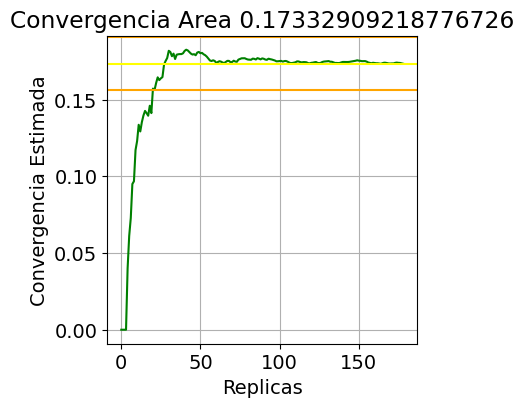

(-8.9, 186.9, -0.0095331000703272, 0.2001951014768712)

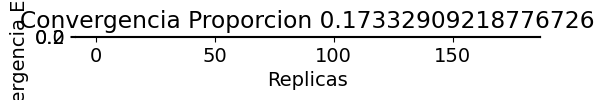

In [59]:
def Convergencia(replicas):
    maximo = np.concatenate((nabsx,pabsx,x4,yigualauno,yigualacero))
    maximo = max(maximo)
    print(maximo)
    hit = 0
    xhit = []
    yhit = []
    xmiss = []
    ymiss = []
    for i in range(replicas):
        _x = rnd.random()
        _y = rnd.uniform(0, maximo)
        eb2 = valorabsoluto(_x)
        eb3 = valorabsoluto2(_x)
        ebe = exponencialbase4(_x)
        #cua = lineal(_x)
        #cub = cero(_x)

        if (_y > ebe) and (_y < eb3) and (_y < eb2):
            hit += 1
            xhit.append(_x)
            yhit.append(_y)
        else:
            xmiss.append(_x)
            ymiss.append(_y)
    proporcion = hit/replicas
    base = max(x)
    altura = maximo
    rectangulo = base * altura
    area = rectangulo * proporcion
    return proporcion,area
varea = []
vproporcion = []
for i in range(1,180):
    a,b = Convergencia(i)
    vproporcion.append(a)
    varea.append(b)
vpromedioa = []
promedioa = 0
convergenciaa = []
vpromediop = []
promediop = 0
convergenciap = []
for vp, va in tqdm(zip(vproporcion, varea), total=len(vproporcion), desc="Calculo Convergencia"):
    vpromedioa.append(va)
    promedioa = st.mean(vpromedioa)
    convergenciaa.append(promedioa)

    vpromediop.append(vp)
    promediop = st.mean(vpromediop)
    convergenciap.append(promediop)

plt.figure(figsize=(4,4))
plt.plot(convergenciaa, color='green',label='Convergencia Area')
plt.axhline(convergenciaa[-1], color='yellow')
plt.axhline(convergenciaa[-1]*1.1, color='orange')
plt.axhline(convergenciaa[-1]*0.9, color='orange')
plt.grid('on')
plt.title(f'Convergencia Area {convergenciaa[-1]}')
plt.xlabel('Replicas')
plt.ylabel('Convergencia Estimada')
plt.show()
plt.figure(figsize=(6,6))
plt.plot(convergenciap, color='green',label='Convergencia Area')
plt.axhline((convergenciap[-1]), color='yellow')
plt.axhline((convergenciap[-1])*1.1, color='orange')
plt.axhline((convergenciap[-1])*0.9, color='orange')
plt.grid('on')
plt.title(f'Convergencia Proporcion {convergenciap[-1]}')
plt.xlabel('Replicas')
plt.ylabel('Convergencia Estimada')
plt.axis('scaled')


Converge aproximadamente con 180 replicas.
